In [1]:
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import PIL.Image
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords
spanishStemmer = stopwords.words('spanish')
import regex
import emoji
from collections import Counter
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis.gensim
from sklearn.cluster import KMeans
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
spanishStemmer0 = set(stopwords.words('spanish'))

#add words that aren't in the NLTK stopwords list
new_stopwords1 = ['t', 'co']
spanishStemmer = spanishStemmer0.union(new_stopwords1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Extraccion datos Twitter

In [3]:
# Leer llaves
keys = pd.read_csv("keys_demo.csv", header=None, sep='\t')
keys = dict(zip(keys[0],keys[1]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [4]:
# Autorizar a través API
auth = tweepy.OAuthHandler(keys['api_key'], keys['api_key_secret'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [5]:
def creacion_twit(tweets):
    t = []
    print(tweets)
    for tweet in tweets:
        temp = []
        temp.append(tweet.full_text)
        temp.append(tweet.created_at)
        #temp.append("Bogota")
        temp.append(tweet.user.location)
        temp.append(tweet.place)
        temp.append(tweet.coordinates)
        temp.append(tweet.id)                      
        temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
        t.append(temp)
    return t

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [6]:
def buscar_twit(hastag):
    tweets = tweepy.Cursor(api.search,
                           q=[str(hastag)+' -RT'],
                           lang='es',
                           tweet_mode='extended',
                           #geocode="4.3556,74.0451,1000km",
                           #location="COlombia",
                           include_rts=False).items(50)
    campo=creacion_twit(tweets)
    print(f"El hastag es {hastag}")
    return campo

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Datos

In [ ]:
data_twit=buscar_twit('alternancia')
data_frame_alternancia=pd.DataFrame(data_twit, columns=['tweet','date','location','place','coordinates','id','link'])

In [ ]:
data_twit=buscar_twit('bachillerato')
data_frame_bachillerato=pd.DataFrame(data_twit, columns=['tweet','date','location','place','coordinates','id','link'])

In [7]:
data_twit=buscar_twit('Covid')
data_frame_covid=pd.DataFrame(data_twit, columns=['tweet','date','location','place','coordinates','id','link'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



El hastag es Covid


In [ ]:
data_frame_covid

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet                date  \
0   @ROSARIOMIX Conozco tanta gente q en este mome... 2021-11-02 00:05:31   
1   🔴 Al inaugurar el Congreso Americano FIA 2021,... 2021-11-02 00:05:25   
2   @AbrilDeavila2 Dale q yo para esas fechas ya e... 2021-11-02 00:05:23   
3   Estudios de vacuna cubana Soberana 02 confirma... 2021-11-02 00:05:19   
4   Argentina prohíbe el ingreso de turistas adult... 2021-11-02 00:05:14   
5   @tyrellmolinero @team_porta @Srta__Santos @Ama... 2021-11-02 00:05:13   
6   Coronavirus🦠 La Secretaría de Salud en #Tamaul... 2021-11-02 00:05:12   
7   Hidrógeno verde\n\nSumalo a la lista:\n\n&gt; ... 2021-11-02 00:05:11   
8   @Claudia60554342 Hola, Claudia, es necesario d... 2021-11-02 00:05:10   
9   #Coronavirus 20 mujeres y 8 hombres contagiado... 2021-11-02 00:05:10   
10  #Coronavirus 20 mujeres y 8 hombres contagiado... 2021-11-02 00:05:09   
11  #1Nov |   Balance AFP: más de 5 millones los m... 2021-11-02 00:05:09   
12  Cuando Salud Pública pide CI, partida de nacim... 2021-11-02 00:05:09   
13  Me da mucha nostalgia ver el altar que les hic... 2021-11-02 00:05:09   
14  @FranAlabi Ponga por metro por fa :(  debo ir ... 2021-11-02 00:05:07   
15  📢 Convocatoria dossier: «Pandemia y desigualda... 2021-11-02 00:05:06   
16     Cada colector tendrá su semaforo🚦 anti COVID 🤡 2021-11-02 00:05:03   
17  @Refust @SalvoMontalban6 @joycelewin77 He vivi... 2021-11-02 00:05:01   
18                   ¿A los pájaros les dará Covid? 🤔 2021-11-02 00:05:01   
19  En China _comenzaron_ a vacunar chicos (A part... 2021-11-02 00:05:01   
20  Nadie sale hasta salir negativos.\nDisneyland ... 2021-11-02 00:05:00   
21  Nadie sale hasta salir negativos.\nDisneyland ... 2021-11-02 00:05:00   
22  Nadie sale hasta salir negativos.\nDisneyland ... 2021-11-02 00:05:00   
23  Nadie sale hasta salir negativos.\nDisneyland ... 2021-11-02 00:05:00   
24  Nadie sale hasta salir negativos.\nDisneyland ... 2021-11-02 00:05:00   
25  #1Nov La antigripal está recomendada para casi... 2021-11-02 00:05:00   
26  En vez de “COVID Babies” los voy a llamar #Cov... 2021-11-02 00:04:58   
27  Parte diario covid-19\n\nSituación epidemiológ... 2021-11-02 00:04:56   
28  Abinader destituye gobernadora de Samaná tras ... 2021-11-02 00:04:50   
29  @Ale_Gallardo1 Así es Alejandra estamos todos ... 2021-11-02 00:04:41   
30  Los casos de COVID-19 se han incrementado en l... 2021-11-02 00:04:39   
31  México registra 99 muertes por COVID-19 y 994 ... 2021-11-02 00:04:36   
32  Qué tratamientos para curar su arritmia post C... 2021-11-02 00:04:33   
33  @ZYTJavier Yo creo que se salieron o los expul... 2021-11-02 00:04:32   
34  #Noviembre2021 \nArrancó con 994 contagios por... 2021-11-02 00:04:30   
35  @zulma54137866 Es por la cepa nueva del COVID,... 2021-11-02 00:04:29   
36  @fafalactico @NortenaCatrina Uta, ése con un m... 2021-11-02 00:04:22   
37  #SALUD | Semáforo Covid Entra en Vigencia Desd... 2021-11-02 00:04:14   
38  #CoronavirusGT | El @MinSaludGuate procesó 1 m... 2021-11-02 00:04:12   
39  Con una población de 11,5 millones de habitant... 2021-11-02 00:04:11   
40  @Darth_Mendex Es increíble leer tanto odio a l... 2021-11-02 00:04:10   
41  ¡HOY último día hasta las 23:59!\n\nTe invitam... 2021-11-02 00:04:08   
42  @TamaraL41654252 @mauri_perez @doctormacias No... 2021-11-02 00:04:04   
43  Ministerio de Salud reporta contagio de 85 per... 2021-11-02 00:04:02   
44  @blake_rom El covid una gran pantalla para ocu... 2021-11-02 00:04:01   
45  @raul_olaechea La prensa basura cloacal sale a... 2021-11-02 00:04:00   
46  Jajajajajajaja por lo menos no fue el covid lo... 2021-11-02 00:03:57   
47  Tienes hasta las 23:59 horas del día de hoy pa... 2021-11-02 00:03:56   
48  La Palma registró el mayor sismo por la erupci... 2021-11-02 00:03:54   
49  [VIDEO] Persisten riesgos por COVID-19, pero s... 2021-11-02 00:03:50   

                          location  \
0                                    
1   9 sur 1905 Chula Vista. Puebla   
2     

In [ ]:
data_twit=buscar_twit('educacion virtual')
data_frame_educacion_virtual=pd.DataFrame(data_twit, columns=['tweet','date','location','place','coordinates','id','link'])

In [ ]:
data_twit=buscar_twit('colegio')
data_frame_colegios_1=pd.DataFrame(data_twit, columns=['tweet','date','location','place','coordinates','id','link'])

In [ ]:
data_twit=buscar_twit('Icfes')
data_frame_Icfes=pd.DataFrame(data_twit, columns=['tweet','date','location','place','coordinates','id','link'])

In [ ]:
data_twit=buscar_twit('Saber-11')
data_frame_Saber=pd.DataFrame(data_twit, columns=['tweet','date','location','place','coordinates','id','link'])

# --------------------------------------------------

In [ ]:
data_frame_alternancia['Hashtag']="Alternancia"
#data_frame_bachillerato['Hashtag']="Bachillerato"
#data_frame_covid['Hashtag']="Covid"
data_frame_educacion_virtual['Hashtag']="Educacion virtual"
data_frame_colegios_1['Hashtag']="Colegio"
data_frame_Icfes['Hashtag']="Icfes"
data_frame_Saber['Hashtag']="Saber-11"

In [ ]:
union = pd.concat([data_frame_alternancia,
                   #data_frame_bachillerato,
                   #data_frame_covid,
                   data_frame_educacion_virtual,
                   data_frame_colegios_1,
                   data_frame_Icfes,
                   data_frame_Saber])

In [ ]:
union.to_excel("D:/Universidad/Maestria/Tesis/DATOS/Data_twitter.xlsx",index=False)
union.to_csv("D:/Universidad/Maestria/Tesis/DATOS/Data_twitter.csv",index=False)

In [ ]:
union

In [ ]:
data_frame['tweet'][0]

In [ ]:
#data_frame.to_excel("C:/Users/ASUS/Downloads/example_twitter3.xlsx")


In [ ]:
data_twit_alternancia=buscar_twit('alternancia')

In [ ]:
data_frame[['id']].count()

In [ ]:
data_frame['tweet'][3]

### av villas

In [3]:
df_union0= pd.read_excel("D:/Universidad/Maestria/Tesis/DATOS/Data_twitter_2.xlsx")
df_union1= pd.read_excel("C:/Users/ASUS/Downloads/Data_twitter_covid.xlsx")

df_union= pd.concat([df_union0 , df_union1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\ProgramData\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning:

This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.

C:\ProgramData\Anaconda3\lib\site-packages\xlrd\xlsx.py:312: DeprecationWarning:

This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.

C:\ProgramData\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning:

This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.

C:\ProgramData\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning:

This method will be removed in future ver

In [4]:
df_union

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet                date  \
0    CLASE TRANSMISIÓN EN VIVO EN ÉPOCA DE ALTERNAN... 2021-10-31 16:13:08   
1    Familia biológica: un apoyo o un problema... o... 2021-10-31 14:56:44   
2    @JCardenasRey @vanguardiacom @LaFmNoticiasBga ... 2021-10-31 13:28:17   
3    #CaracolAlCampo | El Centro Agropecuario La Gr... 2021-10-31 10:20:00   
4    Uno de los desafíos para los modelos de altern... 2021-10-30 15:29:00   
..                                                 ...                 ...   
995  #Entérate📢 | El Gobierno de México dio por cum... 2021-11-02 00:00:00   
996  #BOGOTÁ\nLas autoridades sanitarias de Colombi... 2021-11-02 00:00:00   
997  Se trata de las toallitas húmedas y las que se... 2021-11-02 00:00:00   
998  Tony Eleta, Gerente General de Pan-American Li... 2021-11-02 00:00:00   
999  Florida agrega 1,711 positivos por covid-19: A... 2021-11-02 00:00:00   

                           location place coordinates                   id  \
0                          COLOMBIA   NaN         NaN  1454843894584259072   
1            Bogotá, D.C., Colombia   NaN         NaN  1454824665403298048   
2                       Bucaramanga   NaN         NaN  1454802409012740096   
3                          Colombia   NaN         NaN  1454755023259202048   
4                  Bogotá, Colombia   NaN         NaN  1454470397785673984   
..                              ...   ...         ...                  ...   
995                Pachuca, Hidalgo   NaN         NaN  1455323772806843904   
996                Machala, Ecuador   NaN         NaN  1455323772379013120   
997                             NaN   NaN         NaN  1455323772047838976   
998  EE.UU., Latinoamérica y Caribe   NaN         NaN  1455323771611533056   
999                             NaN   NaN         NaN  1455323771255108096   

                                                  link      Hashtag  
0    https://twitter.com/i/web/status/1454843894584...  Alternancia  
1    https://twitter.com/i/web/status/1454824665403...  Alternancia  
2    https://twitter.com/i/web/status/1454802409012...  Alternancia  
3    https://twitter.com/i/web/status/1454755023259...  Alternancia  
4    https://twitter.com/i/web/status/1454470397785...  Alternancia  
..                                                 ...          ...  
995  https://twitter.com/i/web/status/1455323772806...          NaN  
996  https://twitter.com/i/web/status/1455323772379...          NaN  
997  https://twitter.com/i/web/status/1455323772047...          NaN  
998  https://twitter.com/i/web/status/1455323771611...          NaN  
999  https://twitter.com/i/web/status/1455323771255...          NaN  

[1889 rows x 8 columns]

In [15]:
#df_union = data_frame.append(data_frame2, ignore_index=True)
df_union['id'].count()
df_union

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet                date  \
0    CLASE TRANSMISIÓN EN VIVO EN ÉPOCA DE ALTERNAN... 2021-10-31 16:13:08   
1    Familia biológica: un apoyo o un problema... o... 2021-10-31 14:56:44   
2    @JCardenasRey @vanguardiacom @LaFmNoticiasBga ... 2021-10-31 13:28:17   
3    #CaracolAlCampo | El Centro Agropecuario La Gr... 2021-10-31 10:20:00   
4    Uno de los desafíos para los modelos de altern... 2021-10-30 15:29:00   
..                                                 ...                 ...   
995  #Entérate📢 | El Gobierno de México dio por cum... 2021-11-02 00:00:00   
996  #BOGOTÁ\nLas autoridades sanitarias de Colombi... 2021-11-02 00:00:00   
997  Se trata de las toallitas húmedas y las que se... 2021-11-02 00:00:00   
998  Tony Eleta, Gerente General de Pan-American Li... 2021-11-02 00:00:00   
999  Florida agrega 1,711 positivos por covid-19: A... 2021-11-02 00:00:00   

                           location place coordinates                   id  \
0                          COLOMBIA   NaN         NaN  1454843894584259072   
1            Bogotá, D.C., Colombia   NaN         NaN  1454824665403298048   
2                       Bucaramanga   NaN         NaN  1454802409012740096   
3                          Colombia   NaN         NaN  1454755023259202048   
4                  Bogotá, Colombia   NaN         NaN  1454470397785673984   
..                              ...   ...         ...                  ...   
995                Pachuca, Hidalgo   NaN         NaN  1455323772806843904   
996                Machala, Ecuador   NaN         NaN  1455323772379013120   
997                             NaN   NaN         NaN  1455323772047838976   
998  EE.UU., Latinoamérica y Caribe   NaN         NaN  1455323771611533056   
999                             NaN   NaN         NaN  1455323771255108096   

                                                  link      Hashtag  
0    https://twitter.com/i/web/status/1454843894584...  Alternancia  
1    https://twitter.com/i/web/status/1454824665403...  Alternancia  
2    https://twitter.com/i/web/status/1454802409012...  Alternancia  
3    https://twitter.com/i/web/status/1454755023259...  Alternancia  
4    https://twitter.com/i/web/status/1454470397785...  Alternancia  
..                                                 ...          ...  
995  https://twitter.com/i/web/status/1455323772806...          NaN  
996  https://twitter.com/i/web/status/1455323772379...          NaN  
997  https://twitter.com/i/web/status/1455323772047...          NaN  
998  https://twitter.com/i/web/status/1455323771611...          NaN  
999  https://twitter.com/i/web/status/1455323771255...          NaN  

[1889 rows x 8 columns]

# Clasificacion de textos

In [25]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in spanishStemmer])
    #texto = " ".join([spanishStemmer.stem(palabra) for palabra in texto.split()])
    return texto

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [17]:
df_union["procesado"]= df_union['tweet'].apply(lambda texto: pre_procesado(texto))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [19]:
cadena=""
for a in df_union["procesado"]:
    cadena=cadena+a
cadena=cadena.split()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [20]:
cadena_campos=pd.DataFrame(cadena,columns=['Palabra'])
cadena_campos['validador']=1
agrupacion_palabras = cadena_campos.groupby(['Palabra'], as_index = False)[['validador']].sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [21]:
agrupacion_palabras=agrupacion_palabras.sort_values(by='validador', ascending=False)
agrupacion_palabras

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Palabra  validador
4044      https       1287
1824      covid        910
4094      icfes        353
2731  educación        184
9221    virtual        169
...         ...        ...
3920     hexduw          1
3919     hetero          1
3915     heroes          1
3914   hermanos          1
9753        𝒒𝒖𝒆          1

[9754 rows x 2 columns]

# Analisis de sentimientos

In [19]:
from deep_translator import GoogleTranslator
def traduccion(to_translate):
    translated = GoogleTranslator(source='es', target='english').translate(to_translate)
    return translated

def generar_grafico2(datos,imagen):
    calabaza = PIL.Image.open(imagen)
    mask = np.array(calabaza)
    palabras = datos.procesado.str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=400,
                         max_font_size=150, max_words=800,
                         background_color='black', 
                         stopwords=spanishStemmer,
                         mask=mask, contour_width=0.5, contour_color='white').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
                         #title= "Ejemplo"
    wordcloud.to_file(imagen)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title="Ejemplo"
    return plt

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [28]:
#df_union0= pd.read_excel("D:/Universidad/Maestria/Tesis/DATOS/Data_twitter_2.xlsx")
#df_union1
df_union0['tweetingles']=df_union0['tweet'].apply(lambda text: traduccion(text))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [29]:
df_union1['tweetingles']=df_union1['tweet'].apply(lambda text: traduccion(text))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [30]:
df_union = pd.concat([df_union0,df_union1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [31]:
df_union[['tweetingles','tweet']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweetingles  \
0    LIVE STREAMING CLASS IN TIME OF ALTERNANCE\nht...   
1    Biological family: a support or a problem ... ...   
2    @JCardenasRey @vanguardiacom @LaFmNoticiasBga ...   
3    #CaracolAlCampo | The La Granja Agricultural C...   
4    One of the challenges for the models of altern...   
..                                                 ...   
995  # Find out📢 | The Government of Mexico declare...   
996  #BOGOTÁ\nThe Colombian health authorities bega...   
997  These are wet wipes and those used to clean ha...   
998  Tony Eleta, General Manager of Pan-American Li...   
999  Florida adds 1,711 positives for covid-19: Ave...   

                                                 tweet  
0    CLASE TRANSMISIÓN EN VIVO EN ÉPOCA DE ALTERNAN...  
1    Familia biológica: un apoyo o un problema... o...  
2    @JCardenasRey @vanguardiacom @LaFmNoticiasBga ...  
3    #CaracolAlCampo | El Centro Agropecuario La Gr...  
4    Uno de los desafíos para los modelos de altern...  
..                                                 ...  
995  #Entérate📢 | El Gobierno de México dio por cum...  
996  #BOGOTÁ\nLas autoridades sanitarias de Colombi...  
997  Se trata de las toallitas húmedas y las que se...  
998  Tony Eleta, Gerente General de Pan-American Li...  
999  Florida agrega 1,711 positivos por covid-19: A...  

[1889 rows x 2 columns]

In [32]:
vader = SentimentIntensityAnalyzer()
vader.polarity_scores(df_union['tweetingles'])

df_union['neg'] = df_union['tweetingles'].apply(lambda valor: vader.polarity_scores(valor)['neg'])
df_union['neu'] = df_union['tweetingles'].apply(lambda valor: vader.polarity_scores(valor)['neu'])
df_union['pos'] = df_union['tweetingles'].apply(lambda valor: vader.polarity_scores(valor)['pos'])
df_union['compound'] = df_union['tweetingles'].apply(lambda valor: vader.polarity_scores(valor)['compound'])

df_union.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet                date  \
0  CLASE TRANSMISIÓN EN VIVO EN ÉPOCA DE ALTERNAN... 2021-10-31 16:13:08   
1  Familia biológica: un apoyo o un problema... o... 2021-10-31 14:56:44   
2  @JCardenasRey @vanguardiacom @LaFmNoticiasBga ... 2021-10-31 13:28:17   
3  #CaracolAlCampo | El Centro Agropecuario La Gr... 2021-10-31 10:20:00   
4  Uno de los desafíos para los modelos de altern... 2021-10-30 15:29:00   

                 location place coordinates                   id  \
0                COLOMBIA   NaN         NaN  1454843894584259072   
1  Bogotá, D.C., Colombia   NaN         NaN  1454824665403298048   
2             Bucaramanga   NaN         NaN  1454802409012740096   
3                Colombia   NaN         NaN  1454755023259202048   
4        Bogotá, Colombia   NaN         NaN  1454470397785673984   

                                                link      Hashtag  \
0  https://twitter.com/i/web/status/1454843894584...  Alternancia   
1  https://twitter.com/i/web/status/1454824665403...  Alternancia   
2  https://twitter.com/i/web/status/1454802409012...  Alternancia   
3  https://twitter.com/i/web/status/1454755023259...  Alternancia   
4  https://twitter.com/i/web/status/1454470397785...  Alternancia   

                                         tweetingles    neg    neu    pos  \
0  LIVE STREAMING CLASS IN TIME OF ALTERNANCE\nht...  0.000  1.000  0.000   
1  Biological family: a support or a problem ... ...  0.132  0.735  0.132   
2  @JCardenasRey @vanguardiacom @LaFmNoticiasBga ...  0.066  0.885  0.049   
3  #CaracolAlCampo | The La Granja Agricultural C...  0.000  0.917  0.083   
4  One of the challenges for the models of altern...  0.118  0.761  0.121   

   compound  
0    0.0000  
1    0.0000  
2   -0.2960  
3    0.4588  
4   -0.2263

In [33]:
data_pos=df_union[[ 'tweet','pos']].sort_values('pos',ascending=False)
data_pos.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet    pos
161  @YuceOrtiz Así se reagtiva la economía, y de p...  0.605
647                           @MacadanLucii Covid jaja  0.600
711     Les deseo suerte en su icfes o lo que sea haha  0.554
681  @jogun_712 Pareciera que vio al mismísimo COVI...  0.490
428  @Moon_tae07 @BTS_twt Rela, es como un icfes, y...  0.470
258  @FischettiGino @JErnesto74 @ColonOficial Jaja ...  0.453
609          @GringoCingolani De COVID? Que se mejore!  0.444
437  La verdad volvería a hacer el ICFES por mero g...  0.429
306  @AmitriptiIina Apoyo la moción de esperar el b...  0.408
755  Hoy me siento feliz, espero que las pruebas de...  0.399

In [34]:
data_pos['tweet'][100]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



100    #México | 🔴La Secretaría de #Salud federal rep...
100    Inscríbete al curso virtual en educación finan...
Name: tweet, dtype: object

In [35]:
data_pos=df_union[[ 'tweet','neg']].sort_values('neg',ascending=False)
data_pos.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet    neg
333                                     Maldito covid.  0.730
718  Esas fallas del ICFES, me tienen preocupada.\n\n😨  0.627
624           Horrible ese aplicativo para las ICFES 😠  0.576
699              Maldito ICFES https://t.co/jeGjRqkGNo  0.574
479                              Odio a los icfes, fin  0.552
359                              Odio el icfes virtual  0.552
728  Nueva zelanda abandonando poco a poco la histe...  0.524
487                     Marica soñé con el ICFES 😭😭😭😭😭  0.508
29   Tu has odio lo del covid ese??? Dos semanas si...  0.481
112                             el covid nos tiene mal  0.467

In [36]:
data_pos['tweet'][2]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



2    @oc_maximatsuno @VaderCristo Es como el covid ...
2    @JCardenasRey @vanguardiacom @LaFmNoticiasBga ...
Name: tweet, dtype: object

In [37]:
def desc_sentimiento(row):
    numero = row['compound']
    if(numero>=0.4):
        descipcion="Positivo"
    elif(numero>=-0.6):
        descipcion="Neutro"
    else:
        descipcion="Negativo"
    return descipcion

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [38]:
df_union['sentimiento'] = df_union.apply(desc_sentimiento, axis=1, result_type='expand')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [39]:
df_union.groupby(['sentimiento'], as_index = False)[['tweet']].count()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



sentimiento  tweet
0    Negativo    192
1      Neutro   1109
2    Positivo    588

In [40]:
data_positivo=df_union[df_union['sentimiento']=="Positivo"]
generar_grafico2(data_positivo,"positivo2.png")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



AttributeError: 'DataFrame' object has no attribute 'procesado'

In [41]:
data_neutro=df_union[df_union['sentimiento']=="Neutro"]
generar_grafico2(data_neutro,"neutro.png")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



AttributeError: 'DataFrame' object has no attribute 'procesado'

In [42]:
data_negativo=df_union[df_union['sentimiento']=="Negativo"]
generar_grafico2(data_negativo,"negativo.png")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



AttributeError: 'DataFrame' object has no attribute 'procesado'

In [48]:
df_union

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet                date  \
0    CLASE TRANSMISIÓN EN VIVO EN ÉPOCA DE ALTERNAN... 2021-10-31 16:13:08   
1    Familia biológica: un apoyo o un problema... o... 2021-10-31 14:56:44   
2    @JCardenasRey @vanguardiacom @LaFmNoticiasBga ... 2021-10-31 13:28:17   
3    #CaracolAlCampo | El Centro Agropecuario La Gr... 2021-10-31 10:20:00   
4    Uno de los desafíos para los modelos de altern... 2021-10-30 15:29:00   
..                                                 ...                 ...   
995  #Entérate📢 | El Gobierno de México dio por cum... 2021-11-02 00:00:00   
996  #BOGOTÁ\nLas autoridades sanitarias de Colombi... 2021-11-02 00:00:00   
997  Se trata de las toallitas húmedas y las que se... 2021-11-02 00:00:00   
998  Tony Eleta, Gerente General de Pan-American Li... 2021-11-02 00:00:00   
999  Florida agrega 1,711 positivos por covid-19: A... 2021-11-02 00:00:00   

                           location place coordinates                   id  \
0                          COLOMBIA   NaN         NaN  1454843894584259072   
1            Bogotá, D.C., Colombia   NaN         NaN  1454824665403298048   
2                       Bucaramanga   NaN         NaN  1454802409012740096   
3                          Colombia   NaN         NaN  1454755023259202048   
4                  Bogotá, Colombia   NaN         NaN  1454470397785673984   
..                              ...   ...         ...                  ...   
995                Pachuca, Hidalgo   NaN         NaN  1455323772806843904   
996                Machala, Ecuador   NaN         NaN  1455323772379013120   
997                             NaN   NaN         NaN  1455323772047838976   
998  EE.UU., Latinoamérica y Caribe   NaN         NaN  1455323771611533056   
999                             NaN   NaN         NaN  1455323771255108096   

                                                  link      Hashtag  \
0    https://twitter.com/i/web/status/1454843894584...  Alternancia   
1    https://twitter.com/i/web/status/1454824665403...  Alternancia   
2    https://twitter.com/i/web/status/1454802409012...  Alternancia   
3    https://twitter.com/i/web/status/1454755023259...  Alternancia   
4    https://twitter.com/i/web/status/1454470397785...  Alternancia   
..                                                 ...          ...   
995  https://twitter.com/i/web/status/1455323772806...          NaN   
996  https://twitter.com/i/web/status/1455323772379...          NaN   
997  https://twitter.com/i/web/status/1455323772047...          NaN   
998  https://twitter.com/i/web/status/1455323771611...          NaN   
999  https://twitter.com/i/web/status/1455323771255...          NaN   

                                           tweetingles    neg    neu    pos  \
0    LIVE STREAMING CLASS IN TIME OF ALTERNANCE\nht...  0.000  1.000  0.000   
1    Biological family: a support or a problem ... ...  0.132  0.735  0.132   
2    @JCardenasRey @vanguardiacom @LaFmNoticiasBga ...  0.066  0.885  0.049   
3    #CaracolAlCampo | The La Granja Agricultural C...  0.000  0.917  0.083   
4    One of the challenges for the models of altern...  0.118  0.761  0.121   
..                                                 ...    ...    ...    ...   
995  # Find out📢 | The Government of Mexico declare...  0.000  1.000  0.000   
996  #BOGOTÁ\nThe Colombian health authorities bega...  0.000  1.000  0.000   
997  These are wet wipes and those used to clean ha...  0.000  0.909  0.091   
998  Tony Eleta, General Manager of Pan-American Li...  0.055  0.894  0.051   
999  Florida adds 1,711 positives for covid-19: Ave...  0.000  0.637  0.363   

     compound sentimiento  
0      0.0000      Neutro  
1      0.0000      Neutro  
2     -0.2960      Neutro  
3      0.4588    Positivo  
4     -0.2263      Neutro  
..        ...         ...  
995    0.0000      Neutro  
996    0.0000      Neutro  
997    0.4019    Positivo  
998   -0.0516      Neutro  
999    0.6908    Positivo  

[1805 rows x 14 columns]

In [49]:
df_union.to_excel("D:/Universidad/Maestria/Tesis/DATOS/Data_twitter_consolidada_final.xlsx",index=False)
df_union.to_csv("D:/Universidad/Maestria/Tesis/DATOS/Data_twitter_consolidada_final.csv",index=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# Analisis grafico

In [5]:
def generar_grafico(datos,imagen):
    calabaza = PIL.Image.open(imagen)
    mask = np.array(calabaza)
    palabras = df_union.procesado.str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=400,
                         max_font_size=150, max_words=800,
                         background_color='black', 
                         stopwords=spanishStemmer,
                         mask=mask, contour_width=0.5, contour_color='white').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
                         #title= "Ejemplo"
    wordcloud.to_file(imagen)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title="Ejemplo"
    return plt

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [10]:
df_union=pd.read_excel("D:/Universidad/Maestria/Tesis/DATOS/Data_twitter_consolidada_final.xlsx",index=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\ProgramData\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning:

This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.

C:\ProgramData\Anaconda3\lib\site-packages\xlrd\xlsx.py:312: DeprecationWarning:

This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.

C:\ProgramData\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning:

This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.



In [11]:
df_union=df_union[df_union['Hashtag']!="Colegio"]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [12]:
df_union.groupby('Hashtag').count()["tweet"].plot(kind='bar')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [35]:
df_union.groupby('Hashtag').count()["tweet"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Hashtag
Alternancia            61
Covid                1000
Educacion virtual      85
Icfes                 596
Saber-11               63
Name: tweet, dtype: int64

In [26]:
df_union["procesado"]= df_union['tweet'].apply(lambda texto: pre_procesado(texto))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [27]:
Alternancia=df_union[df_union['Hashtag']=="Alternancia"]
Colegio=df_union[df_union['Hashtag']=="Colegio"]
Educacion_virtual=df_union[df_union['Hashtag']=="Educacion virtual"]
Icfes=df_union[df_union['Hashtag']=="Icfes"]
Saber_11=df_union[df_union['Hashtag']=="Saber-11"]
Covid=df_union[df_union['Hashtag']=="Covid"]
Saber_11C = pd.concat([Icfes,Saber_11])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [28]:
Alternancia

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet                date  \
0   CLASE TRANSMISIÓN EN VIVO EN ÉPOCA DE ALTERNAN... 2021-10-31 16:13:08   
1   Familia biológica: un apoyo o un problema... o... 2021-10-31 14:56:44   
2   @JCardenasRey @vanguardiacom @LaFmNoticiasBga ... 2021-10-31 13:28:17   
3   #CaracolAlCampo | El Centro Agropecuario La Gr... 2021-10-31 10:20:00   
4   Uno de los desafíos para los modelos de altern... 2021-10-30 15:29:00   
..                                                ...                 ...   
56  Si en Tunja Boyacá se autorizaron aforos del 1... 2021-10-24 01:25:43   
57  ¿Ya te registraste para el evento más esperado... 2021-10-23 16:00:01   
58  El tema además, es que, lo que inició como cri... 2021-10-23 13:55:38   
59  Es anormal que se mantengan solo las clases vi... 2021-10-23 13:43:07   
60  Petro significa en el día a  día pre electoral... 2021-10-23 13:17:17   

                  location                                              place  \
0                 COLOMBIA                                                NaN   
1   Bogotá, D.C., Colombia                                                NaN   
2              Bucaramanga                                                NaN   
3                 Colombia                                                NaN   
4         Bogotá, Colombia                                                NaN   
..                     ...                                                ...   
56         Boyacá Colombia                                                NaN   
57        Colombia, México                                                NaN   
58  Bogotá, D.C., Colombia                                                NaN   
59  Bogotá, D.C., Colombia  Place(_api=<tweepy.api.API object at 0x0000025...   
60        Bogotá, Colombia                                                NaN   

   coordinates                   id  \
0          NaN  1454843894584259072   
1          NaN  1454824665403298048   
2          NaN  1454802409012740096   
3          NaN  1454755023259202048   
4          NaN  1454470397785673984   
..         ...                  ...   
56         NaN  1452083850532856064   
57         NaN  1451941490389929984   
58         NaN  1451910185715473920   
59         NaN  1451907035923108096   
60         NaN  1451900535972450048   

                                                 link      Hashtag  \
0   https://twitter.com/i/web/status/1454843894584...  Alternancia   
1   https://twitter.com/i/web/status/1454824665403...  Alternancia   
2   https://twitter.com/i/web/status/1454802409012...  Alternancia   
3   https://twitter.com/i/web/status/1454755023259...  Alternancia   
4   https://twitter.com/i/web/status/1454470397785...  Alternancia   
..                                                ...          ...   
56  https://twitter.com/i/web/status/1452083850532...  Alternancia   
57  https://twitter.com/i/web/status/1451941490389...  Alternancia   
58  https://twitter.com/i/web/status/1451910185715...  Alternancia   
59  https://twitter.com/i/web/status/1451907035923...  Alternancia   
60  https://twitter.com/i/web/status/1451900535972...  Alternancia   

                                          tweetingles    neg    neu    pos  \
0   LIVE STREAMING CLASS IN TIME OF ALTERNANCE\nht...  0.000  1.000  0.000   
1   Biological family: a support or a problem ... ...  0.132  0.735  0.132   
2   @JCardenasRey @vanguardiacom @LaFmNoticiasBga ...  0.066  0.885  0.049   
3   #CaracolAlCampo | The La Granja Agricultural C...  0.000  0.917  0.083   
4   One of the challenges for the models of altern...  0.118  0.761  0.121   
..                                                ...    ...    ...    ...   
56  If in Tunja Boyacá 100% capacity were authoriz...  0.000  1.000  0.000   
57  Have you already registered for the most antic...  0.000  0.902  0.098   
58  The issue is also that what started as a crisi...  0.130  0.870  0.000   
59  It is abnormal that only virtual or alternatin...  0.000

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

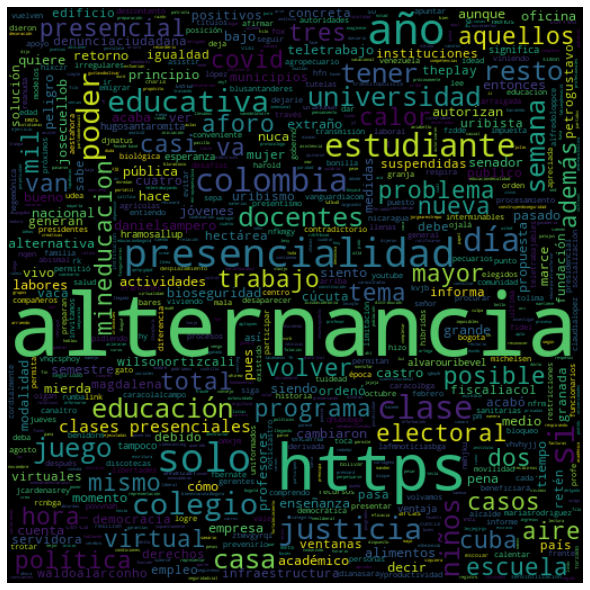

In [29]:
generar_grafico2(Alternancia,"wine.png")

In [31]:
#generar_grafico2(Colegio,"wine.png")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

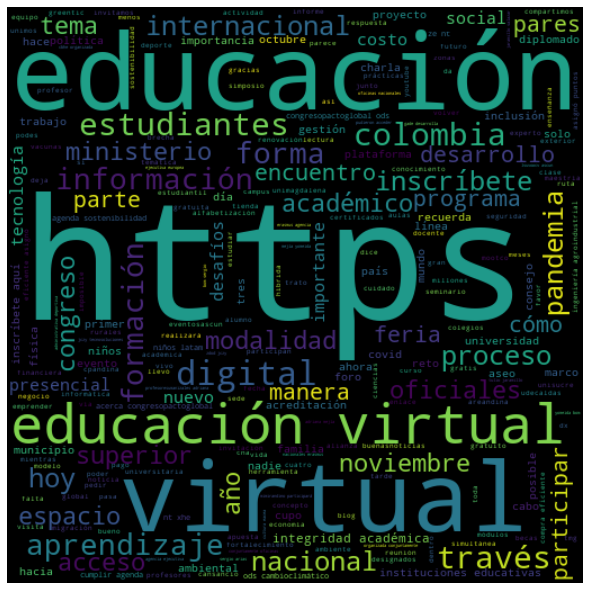

In [32]:
generar_grafico2(Educacion_virtual,"wine.png")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

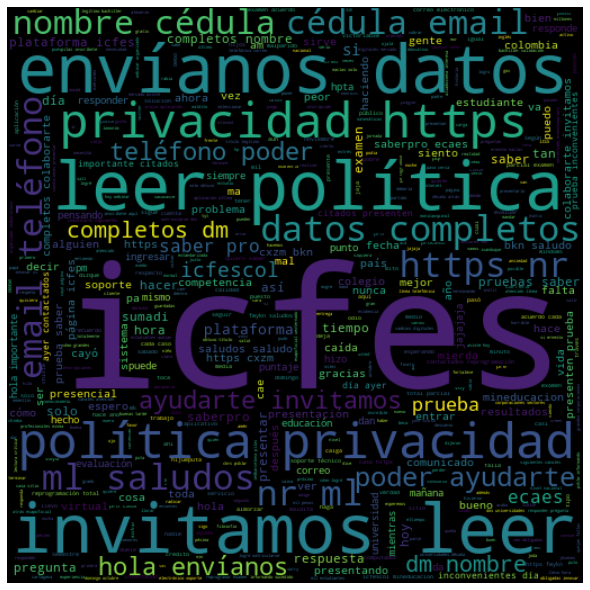

In [36]:
generar_grafico2(Saber_11C,"wine.png")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

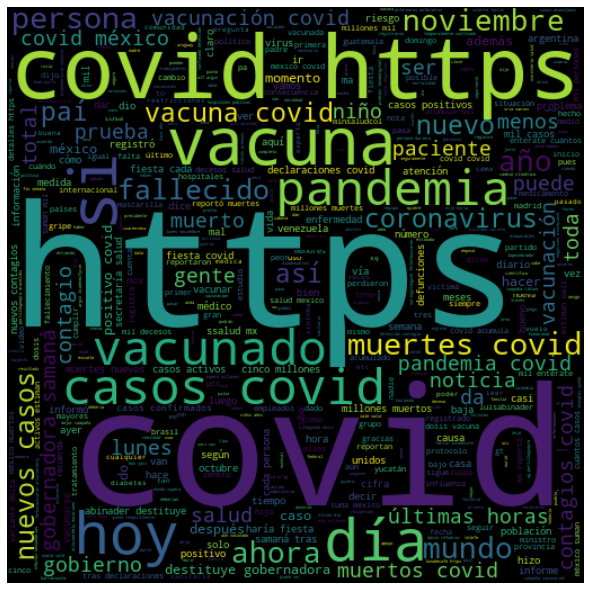

In [42]:
def generar_grafico3(datos,imagen):
    calabaza = PIL.Image.open(imagen)
    mask = np.array(calabaza)
    palabras = datos.procesado.str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=1400,
                         max_font_size=150, max_words=800,
                         background_color='black', 
                         stopwords=spanishStemmer,
                         mask=mask, contour_width=0.5, contour_color='white').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
                         #title= "Ejemplo"
    #wordcloud.to_file(imagen)
    plt.figure(figsize=(40,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title="Ejemplo"
    return plt

generar_grafico3(Covid,"wine.png")

In [47]:
def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    return emoji_list
 
df_union['emojis'] = df_union['tweet'].apply(lambda text: get_emojis(text))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [75]:
df_union.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet                date  \
0  CLASE TRANSMISIÓN EN VIVO EN ÉPOCA DE ALTERNAN... 2021-10-31 16:13:08   
1  Familia biológica: un apoyo o un problema... o... 2021-10-31 14:56:44   
2  @JCardenasRey @vanguardiacom @LaFmNoticiasBga ... 2021-10-31 13:28:17   

                 location place  coordinates                   id  \
0                COLOMBIA   NaN          NaN  1454843894584259072   
1  Bogotá, D.C., Colombia   NaN          NaN  1454824665403298048   
2             Bucaramanga   NaN          NaN  1454802409012740096   

                                                link      Hashtag  \
0  https://twitter.com/i/web/status/1454843894584...  Alternancia   
1  https://twitter.com/i/web/status/1454824665403...  Alternancia   
2  https://twitter.com/i/web/status/1454802409012...  Alternancia   

                                           procesado  \
0  clase transmisión vivo época alternancia https...   
1  familia biológica apoyo problema alternancia d...   
2  jcardenasrey vanguardiacom lafmnoticiasbga blu...   

                                         tweetingles    neg    neu    pos  \
0  LIVE STREAMING CLASS IN TIME OF ALTERNANCE\nht...  0.000  1.000  0.000   
1  Biological family: a support or a problem ... ...  0.132  0.735  0.132   
2  @JCardenasRey @vanguardiacom @LaFmNoticiasBga ...  0.066  0.885  0.049   

   compound emojis  
0     0.000     []  
1     0.000     []  
2    -0.296     []

In [86]:
temp_emojis = pd.DataFrame(list(zip(Counter(sum(df_union.emojis.values,[])).keys(),Counter(sum(df_union.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



emoji  cnt
35     👉   24
68     🤡   22
64     😭   19
90     🙄   17
94     🤯   15
52     🤣   13
38     ✅   13
21    ➡️   13
17     👇   11
56     🥴   11

In [87]:
trace = go.Bar(x=temp_emojis.emoji.values,
               y=temp_emojis.cnt.values)
layout = go.Layout(title='Emojis más usados')
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [61]:
Alternancia['emojis'] = Alternancia['tweet'].apply(lambda text: get_emojis(text))
temp_emojis = pd.DataFrame(list(zip(Counter(sum(Alternancia.emojis.values,[])).keys(),Counter(sum(Alternancia.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-61-61735557e3f0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



emoji  cnt
2     🔊   10
3     🔈   10
0     😩    2
1     😢    1
4     🙃    1
5    🇨🇴    1
6     😪    1
7    🕵️    1
8     🤔    1

In [48]:

trace = go.Bar(x=temp_emojis.emoji.values,
               y=temp_emojis.cnt.values)
layout = go.Layout(title='Emojis más usados Alternancia')
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-48-83e63ad0ff82>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
Educacion_virtual['emojis'] = Educacion_virtual['tweet'].apply(lambda text: get_emojis(text))
temp_emojis = pd.DataFrame(list(zip(Counter(sum(Educacion_virtual.emojis.values,[])).keys(),Counter(sum(Educacion_virtual.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-56-7d03d9119f66>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



emoji  cnt
26     👉    8
29     ✅    6
12    ➡️    5
8      👇    4
2      💻    4
23    🗓️    3
11     🌎    3
39     📍    3
6      ⏰    3
5      📆    3

In [57]:
trace = go.Bar(x=temp_emojis.emoji.values,
               y=temp_emojis.cnt.values)
layout = go.Layout(title='Emojis más usados Educacion virtual')
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [58]:
Saber_11C['emojis'] = Saber_11C['tweet'].apply(lambda text: get_emojis(text))
temp_emojis = pd.DataFrame(list(zip(Counter(sum(Saber_11C.emojis.values,[])).keys(),Counter(sum(Saber_11C.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



emoji  cnt
23     🤡   22
19     😭   19
47     🙄   17
52     🤯   15
4      🤣   13
50     😂   11
9      🥴   11
16     👉    8
89     📈    8
33     😡    7

In [55]:

trace = go.Bar(x=temp_emojis.emoji.values,
               y=temp_emojis.cnt.values)
layout = go.Layout(title='Emojis más usados Saber 11')
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [59]:
Covid['emojis'] = Covid['tweet'].apply(lambda text: get_emojis(text))
temp_emojis = pd.DataFrame(list(zip(Counter(sum(Covid.emojis.values,[])).keys(),Counter(sum(Covid.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-59-1e304e6dd113>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



emoji  cnt
92    🕯️  198
9      👇   31
20     🤣   19
26     🦠   18
3      😷   16
25     💉   15
1      👉   14
40     😂   11
27     🙏   10
5      🔸    8

In [60]:
trace = go.Bar(x=temp_emojis.emoji.values,
               y=temp_emojis.cnt.values)
layout = go.Layout(title='Emojis más usados Covid')
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



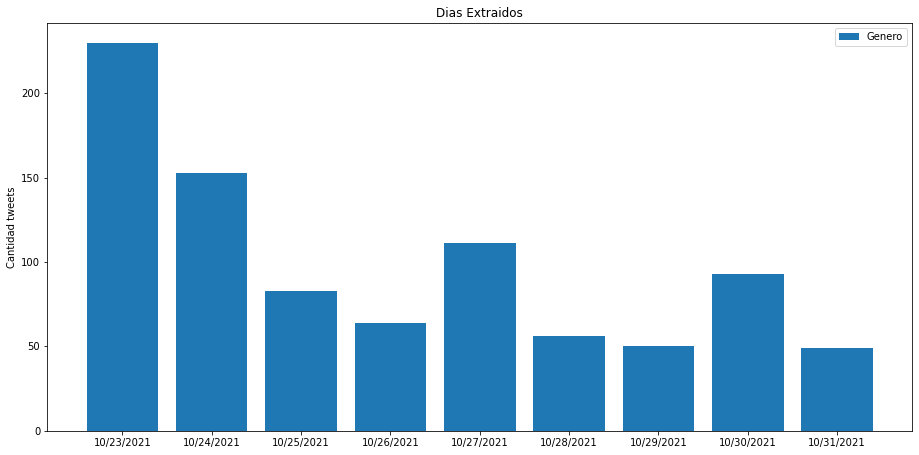

In [94]:
df_union['validador']=1
df_union['dia_publicacion']=df_union['date'].dt.strftime('%m/%d/%Y')

agrupacion_pais = df_union.groupby(['dia_publicacion'], as_index = False)[['validador']].sum()
#groupby("country")["name"].count()
agrupacion_pais
labels = agrupacion_pais["dia_publicacion"]
men_means =agrupacion_pais["validador"]
width = 0.80       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15.5, 7.5)

ax.bar(labels, men_means, width,  label='Genero')
#ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
#       label='Women')

ax.set_ylabel('Cantidad tweets')
ax.set_title('Dias Extraidos')
ax.legend()
plt.show()

# Analisis de Closters

In [69]:
Covid["procesado2"]= Covid['procesado'].apply(lambda texto: texto.split())
dictionary_1 = Dictionary(Covid["procesado2"].values)
dictionary_1.filter_extremes(no_below=20, no_above=0.4)
corpus1 = [dictionary_1.doc2bow(text) for text in Covid["procesado2"].values]
model1 = LdaModel(corpus=corpus1, id2word=dictionary_1, num_topics=5, passes=60)
model1.print_topics(7)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\ProgramData\Anaconda3\lib\asyncio\events.py:81: DeprecationWarning:

`run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-69-26ed70ba2c4f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[(0,
  '0.146*"mil" + 0.115*"méxico" + 0.100*"salud" + 0.090*"casos" + 0.083*"muertes" + 0.064*"pandemia" + 0.059*"país" + 0.056*"horas" + 0.046*"últimas" + 0.038*"decesos"'),
 (1,
  '0.260*"casos" + 0.118*"nuevos" + 0.117*"personas" + 0.084*"lunes" + 0.078*"ser" + 0.065*"gente" + 0.053*"da" + 0.045*"vacunado" + 0.043*"caso" + 0.041*"coronavirus"'),
 (2,
  '0.113*"fiesta" + 0.108*"millones" + 0.091*"mundo" + 0.084*"muertos" + 0.080*"gobernadora" + 0.074*"q" + 0.069*"cada" + 0.065*"samaná" + 0.065*"tras" + 0.051*"abinader"'),
 (3,
  '0.143*"si" + 0.133*"vacuna" + 0.100*"vacunación" + 0.080*"vacunas" + 0.074*"ahora" + 0.069*"años" + 0.066*"dosis" + 0.064*"así" + 0.061*"niños" + 0.053*"x"'),
 (4,
  '0.212*"hoy" + 0.168*"día" + 0.125*"contagios" + 0.096*"menos" + 0.087*"vacunados" + 0.087*"noviembre" + 0.075*"fallecidos" + 0.051*"muertos" + 0.035*"nuevos" + 0.014*"da"')]

In [70]:
lda_display1 = pyLDAvis.gensim.prepare(model1, corpus1, dictionary_1, sort_topics=True)
pyLDAvis.display(lda_display1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [67]:
Saber_11C["procesado2"]= Saber_11C['procesado'].apply(lambda texto: texto.split())
dictionary_1 = Dictionary(Saber_11C["procesado2"].values)
dictionary_1.filter_extremes(no_below=20, no_above=0.4)
corpus1 = [dictionary_1.doc2bow(text) for text in Saber_11C["procesado2"].values]
model1 = LdaModel(corpus=corpus1, id2word=dictionary_1, num_topics=5, passes=60)
model1.print_topics(7)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\ProgramData\Anaconda3\lib\asyncio\events.py:81: DeprecationWarning:

`run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(0,
  '0.206*"si" + 0.116*"hacer" + 0.109*"solo" + 0.093*"prueba" + 0.084*"así" + 0.080*"página" + 0.080*"tan" + 0.080*"plataforma" + 0.070*"ecaes" + 0.061*"hoy"'),
 (1,
  '0.058*"poder" + 0.058*"hola" + 0.057*"nombre" + 0.056*"teléfono" + 0.056*"ayudarte" + 0.056*"cédula" + 0.056*"email" + 0.056*"completos" + 0.056*"datos" + 0.056*"política"'),
 (2,
  '0.129*"invitamos" + 0.103*"saludos" + 0.099*"leer" + 0.091*"envíanos" + 0.086*"datos" + 0.082*"política" + 0.078*"privacidad" + 0.074*"nr" + 0.074*"ml" + 0.069*"completos"'),
 (3,
  '0.235*"icfescol" + 0.150*"ecaes" + 0.110*"examen" + 0.089*"saberpro" + 0.074*"sumadi" + 0.068*"plataforma" + 0.064*"presentar" + 0.062*"día" + 0.053*"prueba" + 0.043*"hoy"'),
 (4,
  '0.406*"saber" + 0.219*"pro" + 0.169*"pruebas" + 0.073*"prueba" + 0.053*"plataforma" + 0.023*"hoy" + 0.019*"presentar" + 0.013*"sumadi" + 0.008*"hola" + 0.001*"hacer"')]

In [68]:
lda_display1 = pyLDAvis.gensim.prepare(model1, corpus1, dictionary_1, sort_topics=True)
pyLDAvis.display(lda_display1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [112]:
Alternancia

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet                date  \
0   CLASE TRANSMISIÓN EN VIVO EN ÉPOCA DE ALTERNAN... 2021-10-31 16:13:08   
1   Familia biológica: un apoyo o un problema... o... 2021-10-31 14:56:44   
2   @JCardenasRey @vanguardiacom @LaFmNoticiasBga ... 2021-10-31 13:28:17   
3   #CaracolAlCampo | El Centro Agropecuario La Gr... 2021-10-31 10:20:00   
4   Uno de los desafíos para los modelos de altern... 2021-10-30 15:29:00   
..                                                ...                 ...   
56  Si en Tunja Boyacá se autorizaron aforos del 1... 2021-10-24 01:25:43   
57  ¿Ya te registraste para el evento más esperado... 2021-10-23 16:00:01   
58  El tema además, es que, lo que inició como cri... 2021-10-23 13:55:38   
59  Es anormal que se mantengan solo las clases vi... 2021-10-23 13:43:07   
60  Petro significa en el día a  día pre electoral... 2021-10-23 13:17:17   

                  location                                              place  \
0                 COLOMBIA                                                NaN   
1   Bogotá, D.C., Colombia                                                NaN   
2              Bucaramanga                                                NaN   
3                 Colombia                                                NaN   
4         Bogotá, Colombia                                                NaN   
..                     ...                                                ...   
56         Boyacá Colombia                                                NaN   
57        Colombia, México                                                NaN   
58  Bogotá, D.C., Colombia                                                NaN   
59  Bogotá, D.C., Colombia  Place(_api=<tweepy.api.API object at 0x0000025...   
60        Bogotá, Colombia                                                NaN   

    coordinates                   id  \
0           NaN  1454843894584259072   
1           NaN  1454824665403298048   
2           NaN  1454802409012740096   
3           NaN  1454755023259202048   
4           NaN  1454470397785673984   
..          ...                  ...   
56          NaN  1452083850532856064   
57          NaN  1451941490389929984   
58          NaN  1451910185715473920   
59          NaN  1451907035923108096   
60          NaN  1451900535972450048   

                                                 link      Hashtag  \
0   https://twitter.com/i/web/status/1454843894584...  Alternancia   
1   https://twitter.com/i/web/status/1454824665403...  Alternancia   
2   https://twitter.com/i/web/status/1454802409012...  Alternancia   
3   https://twitter.com/i/web/status/1454755023259...  Alternancia   
4   https://twitter.com/i/web/status/1454470397785...  Alternancia   
..                                                ...          ...   
56  https://twitter.com/i/web/status/1452083850532...  Alternancia   
57  https://twitter.com/i/web/status/1451941490389...  Alternancia   
58  https://twitter.com/i/web/status/1451910185715...  Alternancia   
59  https://twitter.com/i/web/status/1451907035923...  Alternancia   
60  https://twitter.com/i/web/status/1451900535972...  Alternancia   

                                            procesado  \
0   clase transmisión vivo época alternancia https...   
1   familia biológica apoyo problema alternancia d...   
2   jcardenasrey vanguardiacom lafmnoticiasbga blu...   
3   caracolalcampo centro agropecuario granja sena...   
4   desafíos modelos alternancia presencialidad ca...   
..                                                ...   
56  si tunja boyacá autorizaron aforos colegios un...   
57  registraste evento esperado año moodlemoot col...   
58  tema además inició crisis convirtió negocio ma...   
59  anormal mantengan solo clases virtuales altern...   
60  petro significa día día pre electoral alternat...   

                                          tweetingles    neg    neu    pos  \
0   LIVE STREAMING CLASS IN TIME OF ALTERNANCE\nht...  0.000  1.0

In [117]:
Alternancia["procesado2"]= Alternancia['procesado'].apply(lambda texto: texto.split())
dictionary_1 = Dictionary(Alternancia["procesado2"].values)
dictionary_1.filter_extremes(no_below=20, no_above=0.4)
corpus1 = [dictionary_1.doc2bow(text) for text in Alternancia["procesado2"].values]
model1 = LdaModel(corpus=corpus1, id2word=dictionary_1, num_topics=5, passes=60)
lda_display1 = pyLDAvis.gensim.prepare(model1, corpus1, dictionary_1, sort_topics=True)
pyLDAvis.display(lda_display1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\ProgramData\Anaconda3\lib\asyncio\events.py:81: DeprecationWarning:

`run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-117-95cbcca64ad8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ValueError: cannot compute LDA over an empty collection (no terms)

In [104]:
k = 4
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



KMeans(n_clusters=4)

In [105]:
df_union[['cluster']] = pd.DataFrame(model.labels_)
df_union.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet                date  \
0  CLASE TRANSMISIÓN EN VIVO EN ÉPOCA DE ALTERNAN... 2021-10-31 16:13:08   
1  Familia biológica: un apoyo o un problema... o... 2021-10-31 14:56:44   

                 location place  coordinates                   id  \
0                COLOMBIA   NaN          NaN  1454843894584259072   
1  Bogotá, D.C., Colombia   NaN          NaN  1454824665403298048   

                                                link      Hashtag  \
0  https://twitter.com/i/web/status/1454843894584...  Alternancia   
1  https://twitter.com/i/web/status/1454824665403...  Alternancia   

                                           procesado  \
0  clase transmisión vivo época alternancia https...   
1  familia biológica apoyo problema alternancia d...   

                                         tweetingles    neg    neu    pos  \
0  LIVE STREAMING CLASS IN TIME OF ALTERNANCE\nht...  0.000  1.000  0.000   
1  Biological family: a support or a problem ... ...  0.132  0.735  0.132   

   compound emojis  validador dia_publicacion  \
0       0.0     []          1      10/31/2021   
1       0.0     []          1      10/31/2021   

                                          procesado2  cluster  
0  [clase, transmisión, vivo, época, alternancia,...        0  
1  [familia, biológica, apoyo, problema, alternan...        0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

No handles with labels found to put in legend.


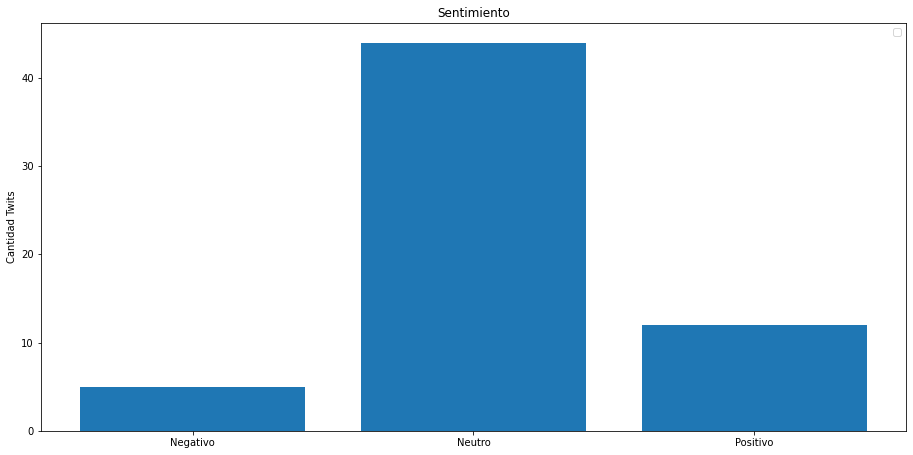

In [71]:
agrupacion_pais =Alternancia.groupby(['sentimiento'], as_index = False)[['tweet']].count()
#groupby("country")["name"].count()
agrupacion_pais
labels = agrupacion_pais["sentimiento"]
men_means =agrupacion_pais["tweet"]
width = 0.80       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15.5, 7.5)

ax.bar(labels, men_means, width)
#ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
#       label='Women')

ax.set_ylabel('Cantidad Twits')
ax.set_title('Sentimiento')
ax.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

No handles with labels found to put in legend.


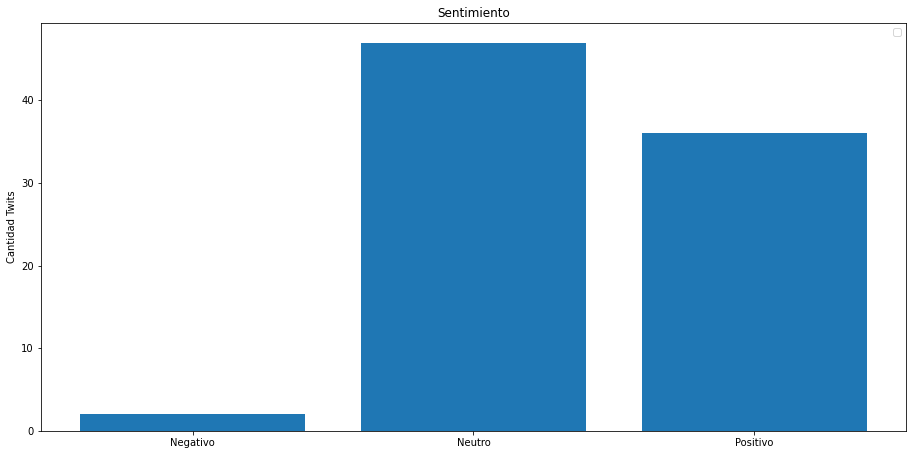

In [73]:
agrupacion_pais =Educacion_virtual.groupby(['sentimiento'], as_index = False)[['tweet']].count()
#groupby("country")["name"].count()
agrupacion_pais
labels = agrupacion_pais["sentimiento"]
men_means =agrupacion_pais["tweet"]
width = 0.80       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15.5, 7.5)

ax.bar(labels, men_means, width)
#ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
#       label='Women')

ax.set_ylabel('Cantidad Twits')
ax.set_title('Sentimiento')
ax.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

No handles with labels found to put in legend.


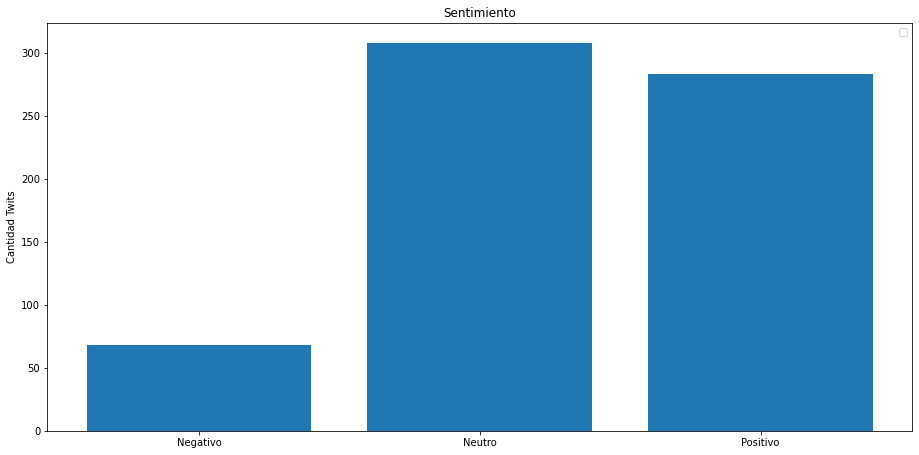

In [74]:
agrupacion_pais =Saber_11C.groupby(['sentimiento'], as_index = False)[['tweet']].count()
#groupby("country")["name"].count()
agrupacion_pais
labels = agrupacion_pais["sentimiento"]
men_means =agrupacion_pais["tweet"]
width = 0.80       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15.5, 7.5)

ax.bar(labels, men_means, width)
#ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
#       label='Women')

ax.set_ylabel('Cantidad Twits')
ax.set_title('Sentimiento')
ax.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

No handles with labels found to put in legend.


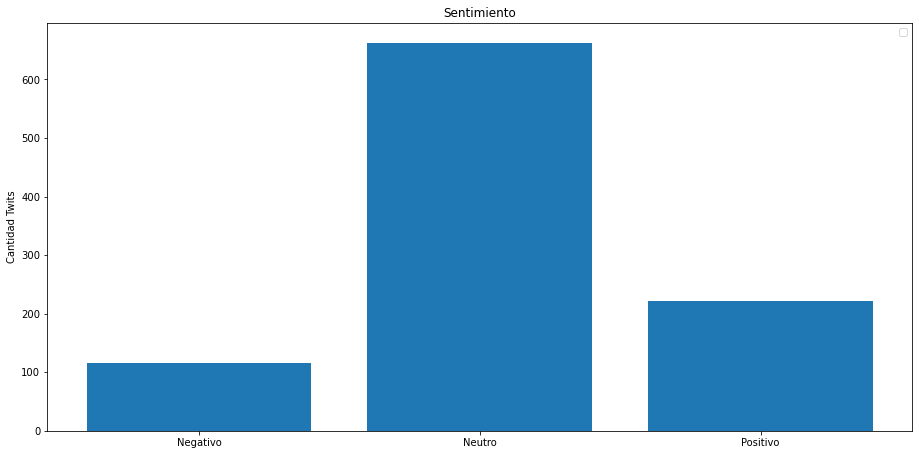

In [75]:
agrupacion_pais =Covid.groupby(['sentimiento'], as_index = False)[['tweet']].count()
#groupby("country")["name"].count()
agrupacion_pais
labels = agrupacion_pais["sentimiento"]
men_means =agrupacion_pais["tweet"]
width = 0.80       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15.5, 7.5)

ax.bar(labels, men_means, width)
#ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
#       label='Women')

ax.set_ylabel('Cantidad Twits')
ax.set_title('Sentimiento')
ax.legend()
plt.show()

In [80]:
data_pos=Alternancia[['tweet','neg']].sort_values('neg',ascending=False)
data_pos.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet    neg
9   La alternancia 😩 me respira en la nuca Marce 😩...  0.296
27  La escuela hablando de alternancia:\n🔊🔊🔊🔊🔊🔊🔊🔊🔊...  0.250
19  Colegio Liceo Samario inicio la alternancia. C...  0.161
53  @ThePlay691 @WilsonOrtizCali @HugoSantaromita ...  0.157
49  #DenunciaCiudadana \n\nUna servidora de la @Fi...  0.146
50  #DenunciaCiudadana \n\nUna servidora de la @Fi...  0.138
1   Familia biológica: un apoyo o un problema... o...  0.132
58  El tema además, es que, lo que inició como cri...  0.130
4   Uno de los desafíos para los modelos de altern...  0.118
22  Cambiaron las listas de alternancia en el trab...  0.114

In [84]:
data_pos=Alternancia[['tweet','pos']].sort_values('pos',ascending=False)
data_pos.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet    pos
20  Postúlate a la categoría N°2: Propuestas innov...  0.296
42  La distribución de las tareas cotidianas de su...  0.218
55  Para completar: Muy lindo tu tema de análisis ...  0.190
22  Cambiaron las listas de alternancia en el trab...  0.185
40  @marcinho11fan ¿Sumercé qué carrera y sede es?...  0.184
43  … y saludar a aquellos niños que aún no han po...  0.175
53  @ThePlay691 @WilsonOrtizCali @HugoSantaromita ...  0.156
26  @Iamadarks Y en la escuela de sociales solo un...  0.153
19  Colegio Liceo Samario inicio la alternancia. C...  0.147
16  #tuidead Apreciada comunidad del IDEAD\n\nLos ...  0.144

In [81]:
data_pos=Educacion_virtual[['tweet','neg']].sort_values('neg',ascending=False)
data_pos.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet    neg
84   Me da tanto cansancio conectarme a clase, pero...  0.251
69   Ya no doy más con la hijueputa educación virtual.  0.216
81   #Educación #CursoVirtual #Tunja #AVISE Curso V...  0.171
125  La deuda que Colombia tiene en temas de educac...  0.104
110  @SergioComunes @mastrxsviento @yesidgonzalezp3...  0.099
118  @EspinosaRadio El problema es que aún falta mu...  0.097
145  📌‘Educación para el empleo y la productividad ...  0.095
129  1. Recuperación del PIB llevaría a bajar el dé...  0.090
126  Educación virtual: 46% de los niños no tuvo ac...  0.078
102  Las redes sociales dentro de la coyuntura neóf...  0.057

In [85]:
data_pos=Educacion_virtual[['tweet','pos']].sort_values('pos',ascending=False)
data_pos.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet    pos
136  Logramos desarrollar un campus de educación, e...  0.298
111  #UNADEnMedios El canal Sonsón TV comparte sobr...  0.263
73   #Recomendado | Charla "Integridad académica en...  0.239
139  Nuestra charla es Presencial con nuestra. Gent...  0.225
77   ¡Ya en vivo con integridad académica! \n\nDesc...  0.223
75   @BluRadioCo Trabajo remoto, educación virtual,...  0.212
96   #EducaciónVirtual 💻 | Actualmente, es posible ...  0.204
115  #ConectadosConLaU\n\n✅IV Simposio Internaciona...  0.203
95   La educación virtual tiene sus falencias, pero...  0.195
121  ¡Se acerca el #11CongresoPactoGlobal, #ODS des...  0.193

In [82]:
data_pos=Covid[['tweet','neg']].sort_values('neg',ascending=False)
data_pos.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet    neg
1138                                     Maldito covid.  0.730
1533  Nueva zelanda abandonando poco a poco la histe...  0.524
834   Tu has odio lo del covid ese??? Dos semanas si...  0.481
917                              el covid nos tiene mal  0.467
1467             @HazimNoelia Los contagiados de Covid.  0.444
1237  La prisión en tiempos de COVID: una sentencia ...  0.436
1453  @noritaaa68 @BrunodiazV Es que causa más miedo...  0.434
1435  @AnniNight Noo lloro, pincharon por tema covid :(  0.429
1299                @thallys113 covid atacando de metro  0.429
1737  Covid-19: denuncian una confabulación para neg...  0.429

In [86]:
data_pos=Covid[['tweet','pos']].sort_values('pos',ascending=False)
data_pos.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet    pos
966   @YuceOrtiz Así se reagtiva la economía, y de p...  0.605
1452                           @MacadanLucii Covid jaja  0.600
1486  @jogun_712 Pareciera que vio al mismísimo COVI...  0.490
1063  @FischettiGino @JErnesto74 @ColonOficial Jaja ...  0.453
1414          @GringoCingolani De COVID? Que se mejore!  0.444
1111  @AmitriptiIina Apoyo la moción de esperar el b...  0.408
1183                     La vacuna no mata, el COVID si  0.384
1322  Yo sé que estamos en contra de la empresa y to...  0.378
1089  Decálogo de Atención Domiciliaria de casos de ...  0.375
1410                  @VBP1601 Positivo y no para covid  0.375

In [83]:
data_pos=Saber_11C [['tweet','neg']].sort_values('neg',ascending=False)
data_pos.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet    neg
634  Esas fallas del ICFES, me tienen preocupada.\n\n😨  0.627
540           Horrible ese aplicativo para las ICFES 😠  0.576
615              Maldito ICFES https://t.co/jeGjRqkGNo  0.574
395                              Odio a los icfes, fin  0.552
275                              Odio el icfes virtual  0.552
403                     Marica soñé con el ICFES 😭😭😭😭😭  0.508
532  Mañana tengo mis Icfes presencial, estoy cagad...  0.448
736  Retro setenta catre doble ochenta hijueputa re...  0.429
492  Tontos terrícolas, temen a un examen que no si...  0.426
721                     Odio la página del ICFES gasss  0.425

In [87]:
data_pos=Saber_11C [['tweet','pos']].sort_values('pos',ascending=False)
data_pos.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tweet    pos
627     Les deseo suerte en su icfes o lo que sea haha  0.554
344  @Moon_tae07 @BTS_twt Rela, es como un icfes, y...  0.470
353  La verdad volvería a hacer el ICFES por mero g...  0.429
671  Hoy me siento feliz, espero que las pruebas de...  0.399
399      @web_ingeniero Hola… pues como el icfes de 11  0.397
519  Bueno se acabo la felicidad, me fue como un cu...  0.396
379  @ElRoRodry Ni sumando  el icfes de todos llega...  0.394
642  Menos mal agarre mis  pruebas presenciales, la...  0.385
503        @ICFEScol Por favor Icfes necesito ayuda 🙏🙏  0.385
327                 @fernandatambo99 ICFES mejor saber  0.367